# Importing Required Libraries

The following libraries are imported for data preprocessing, model training, and evaluation:

- **NumPy**: For numerical operations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib & Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning models and metrics.
- **Warnings**: To suppress warnings during execution.

In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the Dataset

The dataset is loaded into a DataFrame using Pandas for further analysis and processing.

In [95]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Exploratory Data Analysis (EDA)

The following steps are performed to explore the dataset and clean it by identifying missing values, duplicates, and irrelevant columns

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [97]:
df.drop(columns = ['RowNumber','CustomerId','Surname','Gender'], inplace=True)

In [98]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [99]:
df.isnull().sum()

CreditScore           0
Geography             0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
# Summary of categorical columns
print(df['Geography'].value_counts())
print(df['Card Type'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


## Visualizations

### histogram Plot
A histogram is created to visualize the distribution of the 'Age' column in the dataset, along with a Kernel Density Estimate (KDE) curve for a smoother representation.


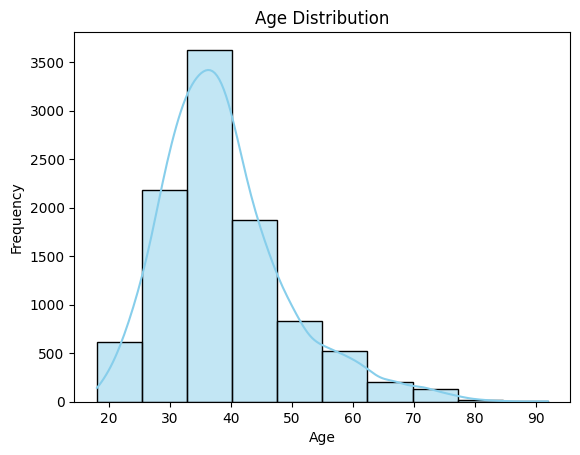

In [102]:
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Count Plot
A count plot is used to visualize the distribution of the 'Geography' feature, showing the frequency of each category.

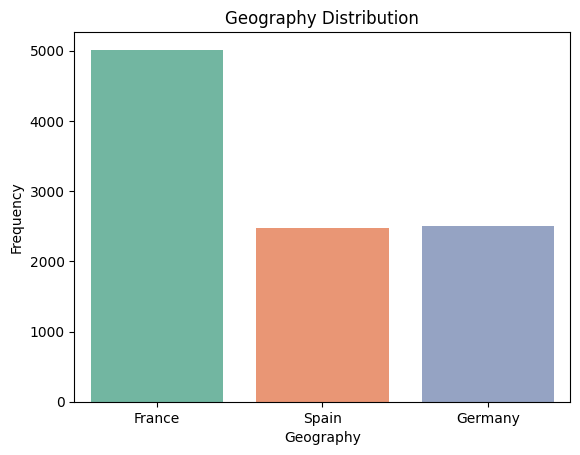

In [103]:
sns.countplot(data=df,x="Geography", palette="Set2")

# Add labels and title
plt.title('Geography Distribution') 
plt.xlabel('Geography')
plt.ylabel('Frequency') 

# Show the plot
plt.show()

### Heatmap Plot
A heatmap is generated to visualize the correlation matrix of numerical features, helping to identify relationships between them.


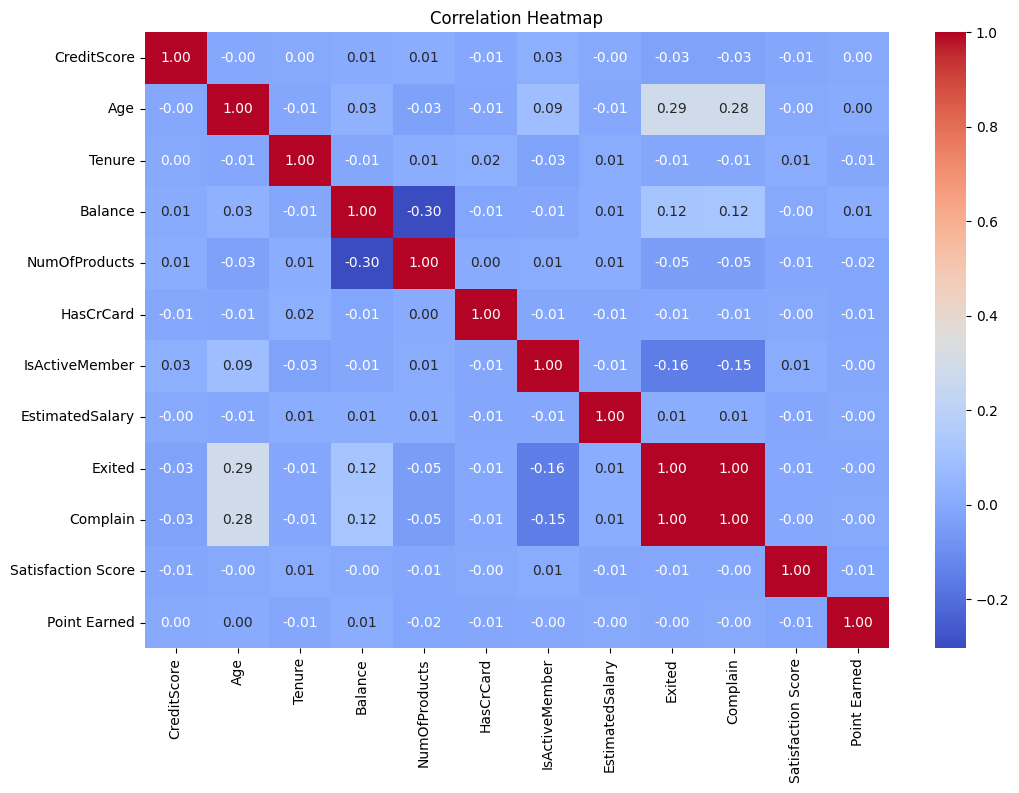

In [104]:
numeric = df.select_dtypes(exclude='object')
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

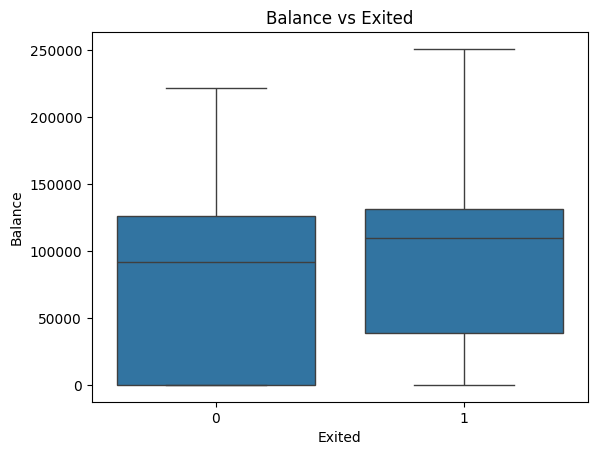

In [105]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited')
plt.show()


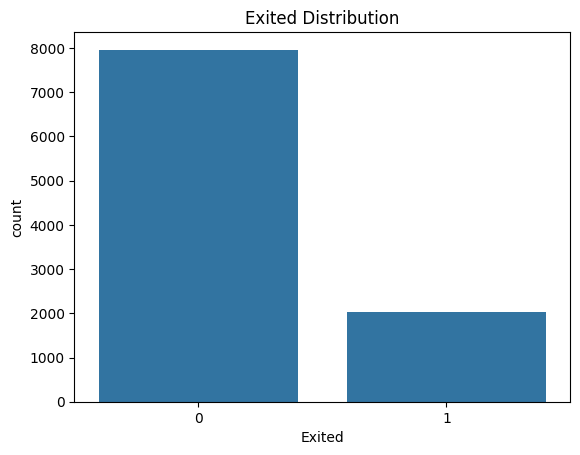

In [106]:
sns.countplot(x='Exited', data=df)
plt.title('Exited Distribution')
plt.show()

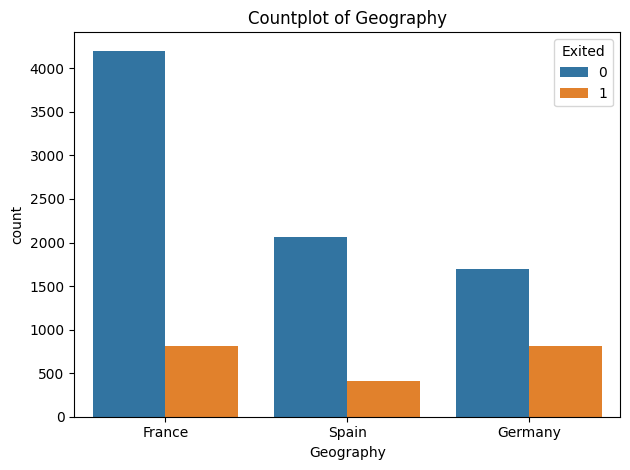

In [107]:
sns.countplot(x='Geography', data=df, hue='Exited')
plt.title('Countplot of Geography')

# Adjust the layout to make sure the plots are not overlapping
plt.tight_layout()
plt.show()

### pairplot
A pairplot is created to explore the relationships between multiple features, with color encoding based on the 'Exited' target variable.

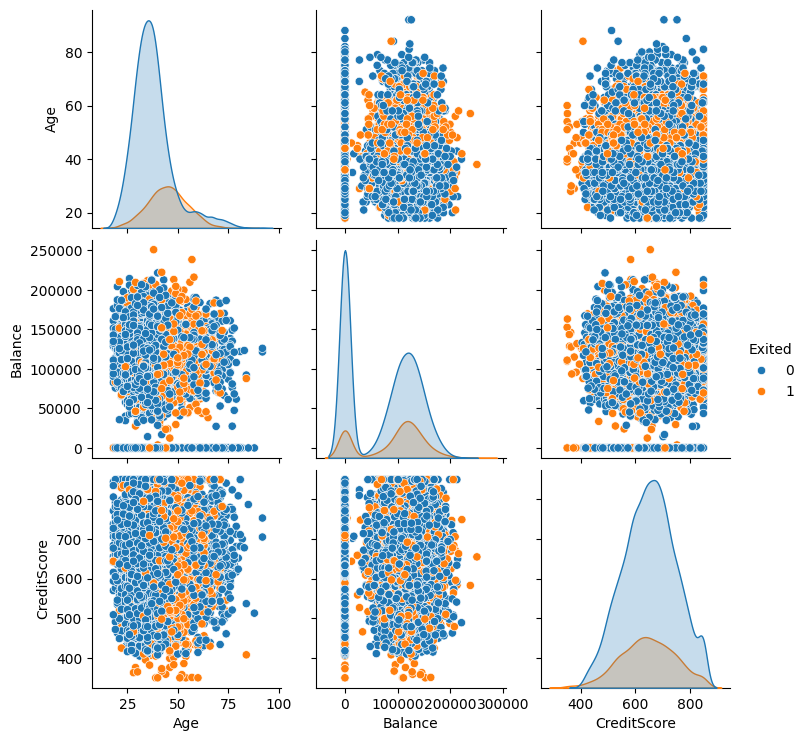

In [108]:

# Pairplot to check relationships between multiple features
sns.pairplot(df[['Age', 'Balance', 'CreditScore', 'Exited']], hue='Exited')
plt.show()

# Train Test Split

In [109]:
X = df.drop(columns=['Exited', 'IsActiveMember', 'NumOfProducts', 'HasCrCard'])
y = df['Exited']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [111]:
X_train.head()

,CreditScore,Geography,Age,Tenure,Balance,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
9254,686,France,32,6,0.00,179093.26,0,2,DIAMOND,510
1561,632,Germany,42,4,119624.60,195978.86,0,4,PLATINUM,959
1670,559,Spain,24,3,114739.92,85891.02,1,4,SILVER,327
6087,561,France,27,9,135637.00,153080.40,1,2,SILVER,567
6669,517,France,56,9,142147.32,39488.04,1,3,PLATINUM,727


# Column Transformation for Preprocessing

A `ColumnTransformer` is created to apply different preprocessing steps to categorical and numerical features in the dataset. This allows for more efficient and tailored data preparation.

In [85]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include = "object").columns
num_features = X.select_dtypes(exclude = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", num_transformer, num_features)
    ]
)


In [86]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['Geography', 'Card Type'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object'))])

In [87]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [88]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.356500,-0.655786,0.345680,-1.218471,1.367670,-0.509942,-0.720010,-0.430193
1,1.0,0.0,0.0,1.0,0.0,-0.203898,0.294938,-0.348369,0.696838,1.661254,-0.509942,0.704342,1.565908
2,0.0,1.0,0.0,0.0,1.0,-0.961472,-1.416365,-0.695393,0.618629,-0.252807,1.961007,0.704342,-1.243749
3,0.0,0.0,0.0,0.0,1.0,-0.940717,-1.131148,1.386753,0.953212,0.915393,1.961007,-0.720010,-0.176791
4,0.0,0.0,0.0,1.0,0.0,-1.397337,1.625953,1.386753,1.057449,-1.059600,1.961007,-0.007834,0.534515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,1.0,1.207474,1.435808,1.039728,-0.102301,-0.539860,-0.509942,-0.007834,-0.167899
7996,0.0,0.0,0.0,1.0,0.0,0.314989,1.816097,-1.389442,-1.218471,-1.733882,-0.509942,0.704342,0.454493
7997,0.0,0.0,0.0,0.0,1.0,0.865009,-0.085351,-1.389442,-1.218471,-0.142765,1.961007,1.416518,0.316678
7998,0.0,0.0,0.0,0.0,0.0,0.159323,0.390011,1.039728,1.827259,-0.050826,1.961007,-0.007834,0.325569


In [89]:
## applying Trnsformation in testing(transform)
X_test=preprocessor.transform(X_test)

In [90]:
X_test

array([[ 1.        ,  0.        ,  1.        , ..., -0.50994211,
        -1.43218616,  0.45449309],
       [ 0.        ,  0.        ,  0.        , ..., -0.50994211,
        -0.72001005, -0.43908443],
       [ 0.        ,  1.        ,  1.        , ..., -0.50994211,
        -1.43218616, -1.4482491 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.96100692,
        -0.72001005, -0.45686707],
       [ 0.        ,  0.        ,  0.        , ...,  1.96100692,
        -0.00783394,  0.35224292],
       [ 1.        ,  0.        ,  0.        , ...,  1.96100692,
         0.70434217,  1.24582045]], shape=(2000, 13))

# Model Training and Evaluation

The following code trains multiple classification models and evaluates their performance on both training and test sets using various metrics: accuracy, F1-score, precision, recall, and ROC AUC score.

In [92]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9945
- Recall: 0.9982
- Roc Auc Score: 0.9984
----------------------------------
Model performance for Test set
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 0.9975
- Recall: 0.9975
- Roc Auc Score: 0.9984


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9970
- F1 score: 0.9970
- Precision: 0.9924
- Recall: 0.9924
- Roc Auc Score: 0.9952


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 0.9975
- Recall: 0.9975
- Roc Auc Score: 0.9984


Gradient Boost
Model performance for Training se

# Best Model Test Performance Report

This section presents the test set performance for the two best-performing models: **Random Forest** and **Logistic Regression**.

## Random Forest

### Model Performance on the Test Set:
- **Accuracy**: 0.9990  
- **F1 Score**: 0.9990  
- **Precision**: 0.9975  
- **Recall**: 0.9975  
- **ROC AUC Score**: 0.9984

**Summary**: Random Forest performs exceptionally well on the test set, with high accuracy, F1 score, precision, and recall. The model generalizes well and demonstrates balanced performance across all evaluation metrics.

---

## Logistic Regression

### Model Performance on the Test Set:
- **Accuracy**: 0.9990  
- **F1 Score**: 0.9990  
- **Precision**: 0.9975  
- **Recall**: 0.9975  
- **ROC AUC Score**: 0.9984

**Summary**: Logistic Regression also performs very well on the test set, showing the same high accuracy and F1 score as Random Forest. The model demonstrates great precision and recall, making it a reliable choice for this task.

---

## Conclusion

Both **Random Forest** and **Logistic Regression** show excellent performance on the test set, with identical results in terms of accuracy, F1 score, precision, recall, and ROC AUC score. These models are highly effective and suitable for predicting customer churn in this dataset.
